In [13]:
from flip_lizards import BinomialModel
from scipy.stats import beta, binom
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9.5, 6]

This notebook is meant to complement Section 2.4 on Bayesian statistics from Luke Harmon's
[book on comparative methods](https://lukejharmon.github.io/pcm/chapters/).
I present this section a bit differently in an effort to make the notation clearer and to cover model posterior probabilities.

# Bayesian statistics

## Bayes theorem

Let's use Bayes' theorem to look at the probability distribution for $p_H$ under our second model ($M_2$) that the probability of our lizard landing heads up can range from 0 to 1.

\begin{equation}
    P(p_H | D) = \frac{P(D | p_H) P(p_H)}{P(D)}
\end{equation}

This tells us that the posterior probability density of any value of $p_H$ is equal to the likelihood of that value---$P(D | p_H)$---times the prior probability density of that value---$P(p_H)$---divided by the marginal (average) probability of our data, also referred to as the marginal likelihood of $M_2$.
The marginal probability of the data is equal the likelihood averaged over all the parameters in the model; in the case of $M_2$ we just have a single parameter ($p_H$) to average over:

\begin{equation}
    P(D) = \int_{0}^{1} P(D | p_H) P(p_H) dp_H
\end{equation}

Note that this is a weighted average, weighted by the prior probability density of $p_H$.

Let's assume a uniform distribution for the prior on $p_H$,
and take a look at the prior and posterior distribution, along with the (scaled) likelihood:


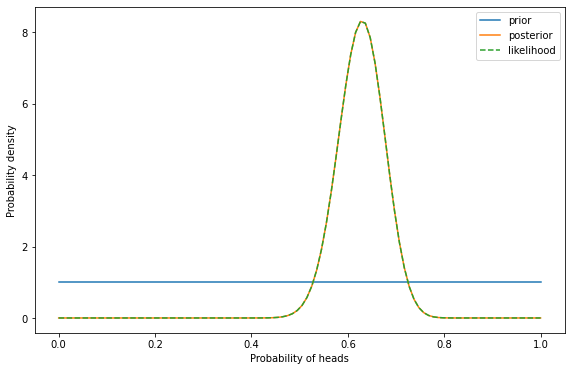

In [15]:
n = 100
h = 63
a = 1
b = 1
x = np.linspace(0, 1, 100)
prior_density = beta.pdf(x = x, a = a, b = b)
likelihood_density = beta.pdf(x = x, a = h + 1, b = n - h + 1)
posterior_density = beta.pdf(x = x, a = a + h, b = b + n - h)
plt.plot(x, prior_density, label = "prior")
plt.plot(x, posterior_density, label = "posterior")
plt.plot(x, likelihood_density, label = "likelihood", linestyle = "--")
plt.xlabel("Probability of heads")
plt.ylabel("Probability density")
plt.legend()

A quick aside: Don't worry too much about how the code above works.
In this simple example of lizard flipping, the posterior and (scaled) likelihood are beta distributions.
I take advantage of that above so we can visualize the prior, likelihood, and posterior densities.
However, with most real-world models, we cannot solve for the posterior so easily, so don't worry about *why* the posterior is a beta here.

Before we get into $M_1$, let's add some notation to our equations above, so that we know they apply to $M_2$:

\begin{equation}
    P(p_H | D, M_2) = \frac{P(D | p_H, M_2) P(p_H | M_2)}{P(D | M_2)}
\end{equation}

\begin{equation}
    P(D | M_2) = \int_{0}^{1} P(D | p_H, M_2) P(p_H | M_2) dp_H
\end{equation}

These equations are the same as the ones above, we have just made them more explicit to make it clear that they apply to $M_2$.
